1. Business understanding
2. Data Mining
3. Data Cleaning
4. Data Exploration
5. Feature Engineering
6. Predictive Modelling
7. Data Visualization

### Business Understanding

To ensure the employee able to Purchase a particular product or not, using Logistic Regression

### Data Mining

In [3]:
# Logistic Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the data
data=pd.read_csv("Purchase.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data.shape

(400, 5)

### Data Cleaning

In [8]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
# no null values in the data

### Data Exploration

In [10]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [11]:
data['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [13]:
data['Age'].min()

18

In [14]:
data['Age'].max()

60

In [17]:
data[(data['Age']>=18)&(data['Age']<=25)]['EstimatedSalary'].mean()

55387.755102040814

In [19]:
data[(data['Age']>=26)&(data['Age']<=36)]['EstimatedSalary'].mean()

68191.48936170213

In [21]:
data[(data['Age']>=37)&(data['Age']<=47)]['EstimatedSalary'].mean()

72052.63157894737

In [22]:
data[(data['Age']>=47)&(data['Age']<=60)]['EstimatedSalary'].mean()

75010.98901098901

In [23]:
data[(data['Age']>=37)&(data['Age']<=47)]

,User ID,Gender,Age,EstimatedSalary,Purchased
16,15733883,Male,47,25000,1
17,15617482,Male,45,26000,1
18,15704583,Male,46,28000,1
20,15649487,Male,45,22000,1
21,15736760,Female,47,49000,1
...,...,...,...,...,...
388,15672330,Male,47,34000,1
391,15592570,Male,47,23000,1
392,15748589,Female,45,45000,1
394,15757632,Female,39,59000,0


In [24]:
data[(data['Age']>=47)&(data['Age']<=60)]

,User ID,Gender,Age,EstimatedSalary,Purchased
16,15733883,Male,47,25000,1
19,15621083,Female,48,29000,1
21,15736760,Female,47,49000,1
22,15714658,Male,48,41000,1
25,15631159,Male,47,20000,1
...,...,...,...,...,...
391,15592570,Male,47,23000,1
393,15635893,Male,60,42000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1


In [25]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [28]:
#sns.barplot(data['Purchased'])

In [29]:
data.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


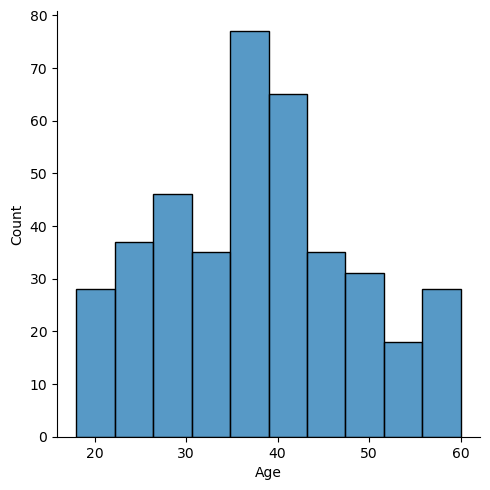

In [33]:
sns.displot(data['Age'])

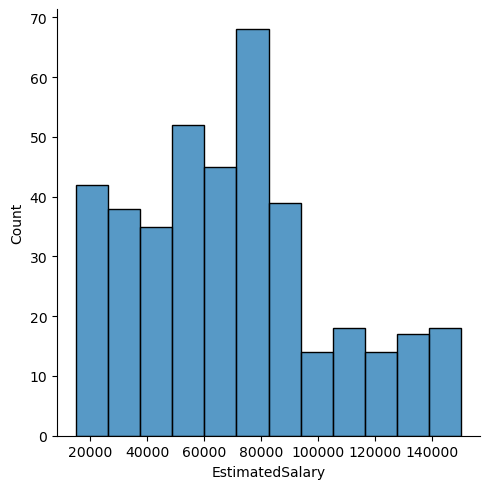

In [34]:
sns.displot(data['EstimatedSalary']);

In [35]:
data['Age'].skew()

0.23133746309642822

In [36]:
data['EstimatedSalary'].skew()

0.49502362888993623

### Feature Engineering

In [52]:
# Independent variables
X=data.loc[:,['Age','EstimatedSalary']].values

In [39]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [53]:
# Dependent variable
y=data.loc[:,'Purchased'].values

In [41]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=0)

In [44]:
X_train.shape

(360, 2)

In [45]:
X_test.shape

(40, 2)

In [46]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

In [55]:
model=LogisticRegression()

In [56]:
model.fit(X_train,y_train)  # Training Process fit function

LogisticRegression()

In [57]:
#prediction
y_pred=model.predict(X_test)

In [58]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [59]:
y_test  # actual test data

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [61]:
accuracy_score(y_pred,y_test)

0.8

In [62]:
confusion_matrix(y_test,y_pred)

array([[32,  0],
       [ 8,  0]], dtype=int64)

In [63]:
model.predict_proba(X_test)

array([[0.54215453, 0.45784547],
       [0.52426532, 0.47573468],
       [0.53636228, 0.46363772],
       [0.5382942 , 0.4617058 ],
       [0.52426532, 0.47573468],
       [0.50971254, 0.49028746],
       [0.50728481, 0.49271519],
       [0.56948644, 0.43051356],
       [0.53297882, 0.46702118],
       [0.52087245, 0.47912755],
       [0.52378075, 0.47621925],
       [0.52668745, 0.47331255],
       [0.52668745, 0.47331255],
       [0.53732838, 0.46267162],
       [0.54167225, 0.45832775],
       [0.55658206, 0.44341794],
       [0.53732838, 0.46267162],
       [0.5411899 , 0.4588101 ],
       [0.56280593, 0.43719407],
       [0.51068352, 0.48931648],
       [0.52281149, 0.47718851],
       [0.56948644, 0.43051356],
       [0.52474984, 0.47525016],
       [0.55082111, 0.44917889],
       [0.51359591, 0.48640409],
       [0.56805695, 0.43194305],
       [0.54215453, 0.45784547],
       [0.538777  , 0.461223  ],
       [0.53007629, 0.46992371],
       [0.54167226, 0.45832774],
       [0.